In [105]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [106]:
df = pd.read_csv('/content/drive/MyDrive/fatalities_isr_pse_conflict_2000_to_2023.csv') #reading dataset
df

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11119,Binyamin Herling,2000-10-19,64.0,Israeli,Nablus,Nablus,West Bank,2000-10-19,M,Israelis,Kedumim,Tulkarm,gunfire,live ammunition,Palestinian civilians,Killed while hiking on Mt. Eival.
11120,Farid Musa 'Issa a-Nesasreh,2000-10-17,28.0,Palestinian,Beit Furik,Nablus,West Bank,2000-10-17,M,Unknown,Beit Furik,Nablus,gunfire,NaN,Israeli civilians,Killed by a settler from Itamar while harvesti...
11121,Hillel Lieberman,2000-10-07,36.0,Israeli,Nablus,Nablus,West Bank,2000-10-07,M,Israelis,Elon Moreh,Nablus,gunfire,live ammunition,Palestinian civilians,His body was found a day after he disappeared.
11122,Fahed Mustafa 'Odeh Baker,2000-10-07,21.0,Palestinian,Bidya,Salfit,West Bank,2000-10-07,M,No,Bidya,Salfit,gunfire,NaN,Israeli civilians,Killed by settlers who rioted in Biddya village.


In [107]:
df.shape

(11124, 16)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [109]:
df.isna().sum() #counts the missing(NaN) values in each column

name                               0
date_of_event                      0
age                              129
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64

In [110]:
#Fill all NaN values in the entire DataFrame with mean values
df.fillna(df.mean(), inplace=True)
df

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11119,Binyamin Herling,2000-10-19,64.0,Israeli,Nablus,Nablus,West Bank,2000-10-19,M,Israelis,Kedumim,Tulkarm,gunfire,live ammunition,Palestinian civilians,Killed while hiking on Mt. Eival.
11120,Farid Musa 'Issa a-Nesasreh,2000-10-17,28.0,Palestinian,Beit Furik,Nablus,West Bank,2000-10-17,M,Unknown,Beit Furik,Nablus,gunfire,NaN,Israeli civilians,Killed by a settler from Itamar while harvesti...
11121,Hillel Lieberman,2000-10-07,36.0,Israeli,Nablus,Nablus,West Bank,2000-10-07,M,Israelis,Elon Moreh,Nablus,gunfire,live ammunition,Palestinian civilians,His body was found a day after he disappeared.
11122,Fahed Mustafa 'Odeh Baker,2000-10-07,21.0,Palestinian,Bidya,Salfit,West Bank,2000-10-07,M,No,Bidya,Salfit,gunfire,NaN,Israeli civilians,Killed by settlers who rioted in Biddya village.


#***Data Visualization***

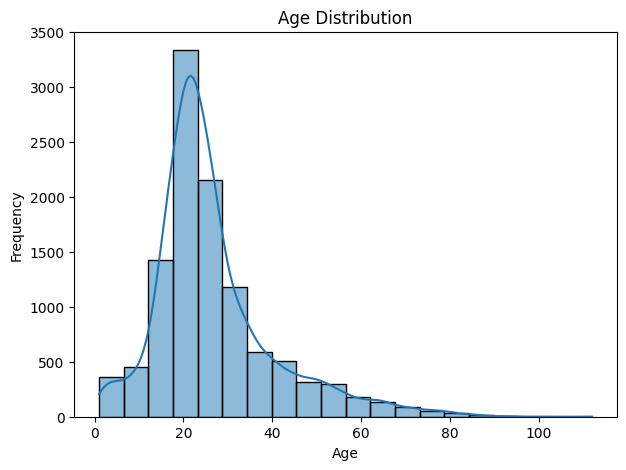

In [111]:
# Histogram for the 'age' column
plt.figure(figsize=(7, 5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Large portion of victims were around the age group of 15 to 35. This means that, most of the killings/murders happened in places, where the youth gathered more.

In [112]:
gender_counts = df['gender'].value_counts()
gender_counts

M    9681
F    1423
Name: gender, dtype: int64

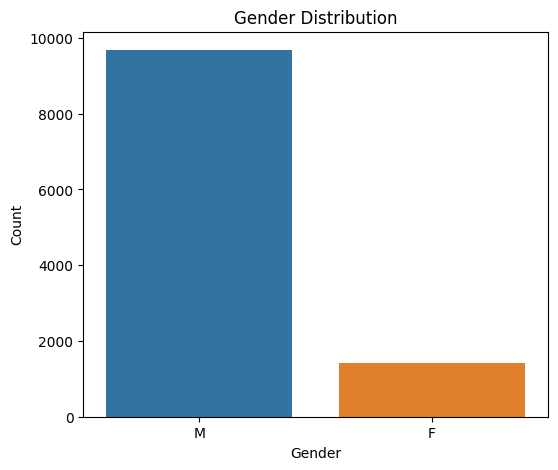

In [113]:
#Bar plot for 'gender'
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(6, 5))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

We can see that, exceptionally large number of males were slaughtered/killed compared to females.

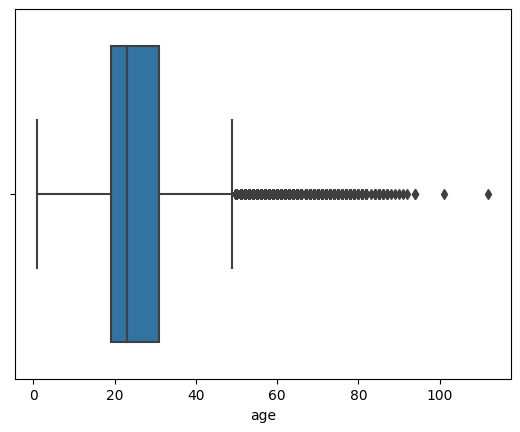

In [114]:
sns.boxplot(data = df, x = 'age')
plt.show()

The boxplot of age data is right-skewed, indicating that most individuals in the dataset are younger, with a few older individuals considered outliers. The median age is relatively lower.

In [115]:
death_counts = df['citizenship'].value_counts()
death_counts

Palestinian    10092
Israeli         1029
Jordanian          2
American           1
Name: citizenship, dtype: int64

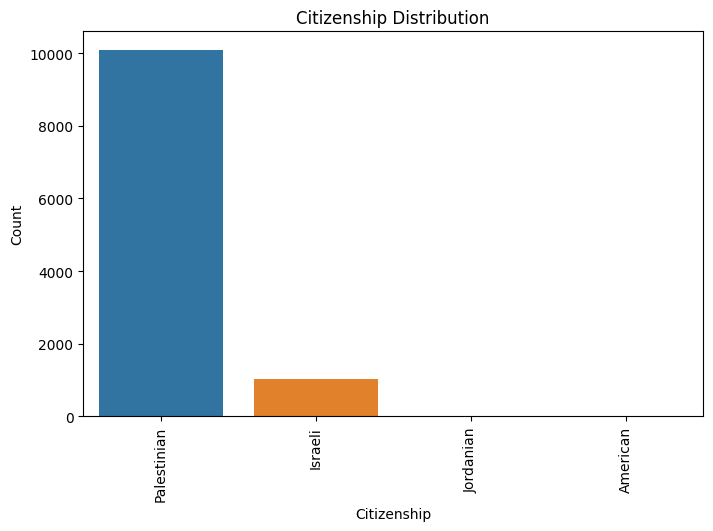

In [116]:
#Bar plot for 'citizenship'
citizenship_counts = df['citizenship'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=citizenship_counts.index, y=citizenship_counts.values)
plt.title('Citizenship Distribution')
plt.xlabel('Citizenship')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Whooping large portion of victims are Palestinian citizens, and the others are Israeli citizens. Jordanian and American citizens are very less affected compared to the others.

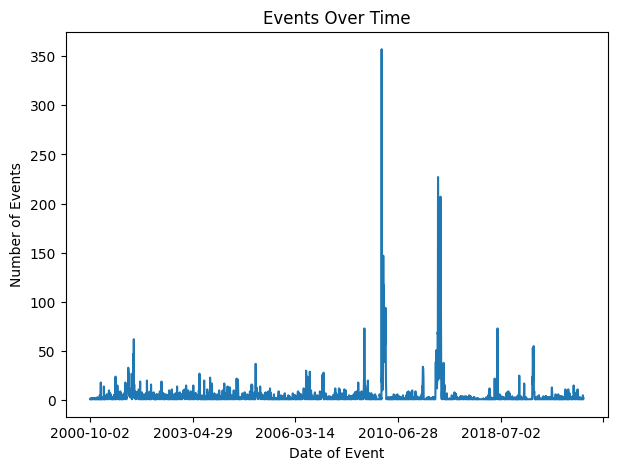

In [117]:
# Calculating the number of events per day
events_per_day = df.groupby('date_of_event').size()
plt.figure(figsize=(7, 5))
events_per_day.plot()
plt.title('Events Over Time')
plt.xlabel('Date of Event')
plt.ylabel('Number of Events')
plt.show()

2009 and 2015 were extremely bad, because a large number of events happened during those times.

In [118]:
# Time Series Analysis i.e. converting date columns to datetime
df['date_of_event'] = pd.to_datetime(df['date_of_event'])
df['date_of_death'] = pd.to_datetime(df['date_of_death'])

Essential to enable accurate temporal data analysis and modeling, facilitating meaningful insights and predictions based on time-related patterns and trends.

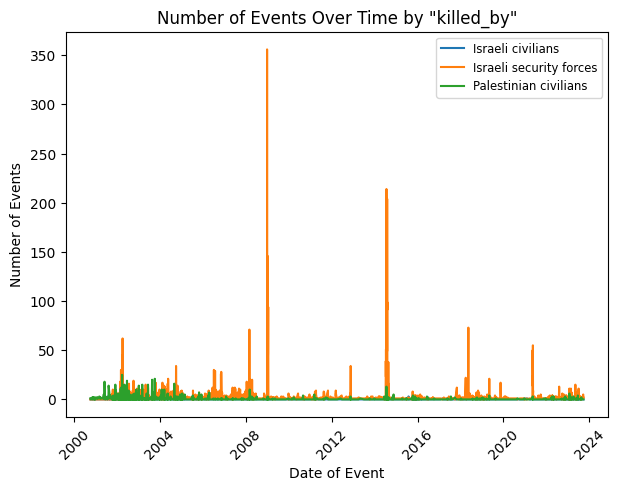

In [119]:
# Grouping the 'date_of_event' and 'killed_by' column and calculating the count of events for each combination
events_by_killed_by = df.groupby(['date_of_event', 'killed_by']).size().unstack().fillna(0)

plt.figure(figsize=(7, 5))
for column in events_by_killed_by.columns:
    plt.plot(events_by_killed_by.index, events_by_killed_by[column], label=column)

plt.title('Number of Events Over Time by "killed_by"')
plt.xlabel('Date of Event')
plt.ylabel('Number of Events')
plt.legend(loc='upper right', fontsize='small')
plt.xticks(rotation=45)
plt.show()

Majority of the victims were killed by Israeli security forces and then by Palestinian civilians. And comparitively less number of people were killed by Israeli civilians.

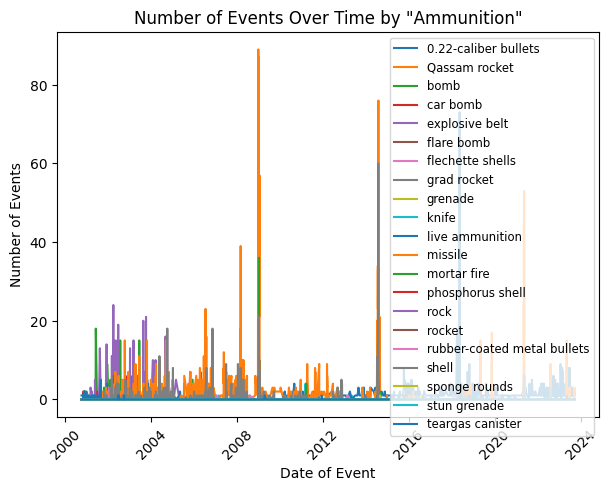

In [120]:
# Grouping the 'date_of_event' and 'ammunition' columns and calculating the count of events for each combination
events_by_ammunition = df.groupby(['date_of_event', 'ammunition']).size().unstack().fillna(0)

plt.figure(figsize=(7, 5))
for column in events_by_ammunition.columns:
    plt.plot(events_by_ammunition.index, events_by_ammunition[column], label=column)

plt.title('Number of Events Over Time by "Ammunition"')
plt.xlabel('Date of Event')
plt.ylabel('Number of Events')
plt.legend(loc='upper right', fontsize='small')
plt.xticks(rotation=45)
plt.show()

We can clearly infer that, the Qassam rocket and missile contributed majorly to kill the victims. And later the explosive belts, rocks, as well as 0.22 calliber bullets were used to kill the civilians. And we could understand that, the situations were very worse, for, a lot of different deadly ammunition was used to kill large masses of people.

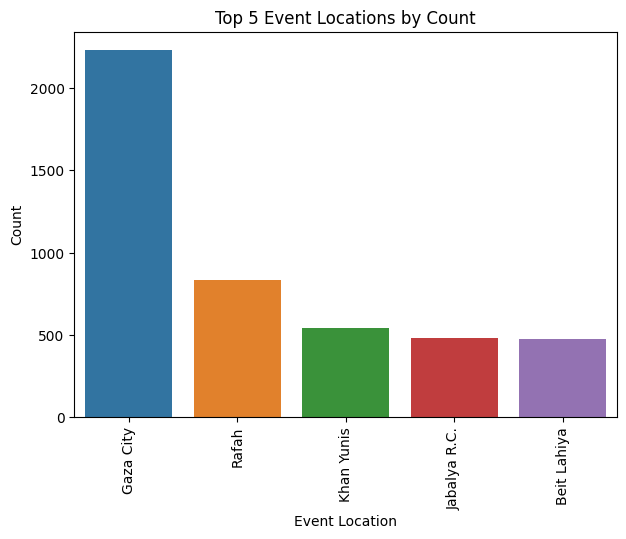

In [121]:
#Top 5 event locations by count
top5_event_locations = df['event_location'].value_counts().head(5)
plt.figure(figsize=(7, 5))
sns.barplot(x=top5_event_locations.index, y=top5_event_locations.values)
plt.title('Top 5 Event Locations by Count')
plt.xlabel('Event Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

From the above graph, we can understand that, most of the deaths/murders happened in Gaza city, and next in Rafah, and then in Khan Yunis, Jabalya R.C., Beit Lahiya. These are the top five cities based on the number of killings. Gaza city is the most affected city.

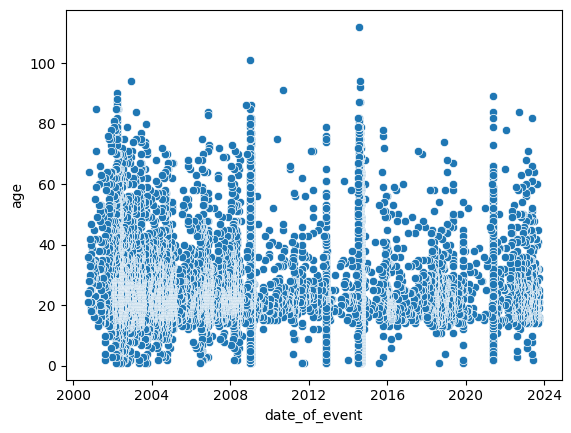

In [122]:
sns.scatterplot(data=df, x = 'date_of_event', y = 'age')
plt.show()

Major portion of victims are between the age groups of 15 and 40 years. Even many senior citizens of were killed. There was a huge massacre between the years 2002 and 2009. Later they reduced comparitively, and were again increased after 2022.

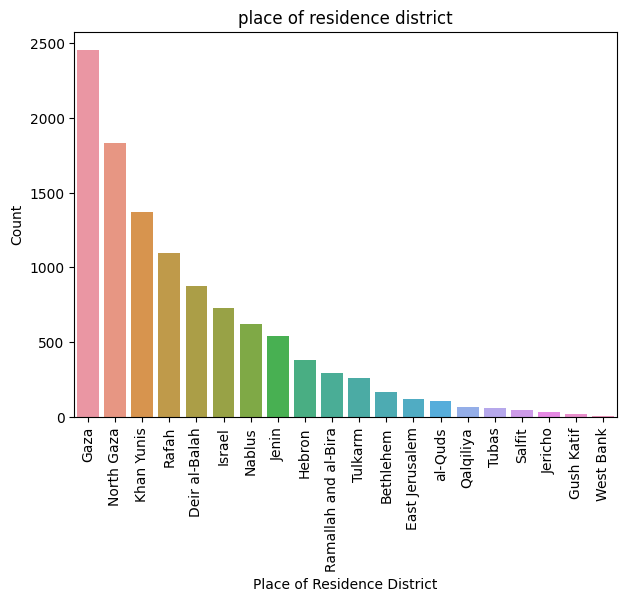

In [123]:
#places of residence by count
place_of_residence_district = df['place_of_residence_district'].value_counts()
plt.figure(figsize=(7, 5))
sns.barplot(x=place_of_residence_district.index, y=place_of_residence_district.values)
plt.title('place of residence district')
plt.xlabel('Place of Residence District')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [124]:
israeli = df[df['citizenship'] == 'Israeli']['type_of_injury'].value_counts().reset_index()
israeli.columns = ['Injury Type', 'Israeli Count']

palestinian = df[df['citizenship'] == 'Palestinian']['type_of_injury'].value_counts().reset_index()
palestinian.columns = ['Injury Type', 'Palestinian Count']

comb = pd.concat([israeli, palestinian], axis=1)
comb      #provides comparative analysis of injury distributions for Israeli and Palestinian citizens.

,Injury Type,Israeli Count,Injury Type,Palestinian Count
0,explosion,508,gunfire,9408
1,gunfire,438,shelling,311
2,stabbing,43,explosion,47
3,hit by a vehicle,14,house demolition,25
4,being bludgeoned with an axe,4,stabbing,5
5,stones throwing,4,beating,5
6,beating,4,hit by a vehicle,4
7,physical assault,1,fire,4
8,physically assaulted,1,stones throwing,2
9,Strangulation,1,physically assaulted,1


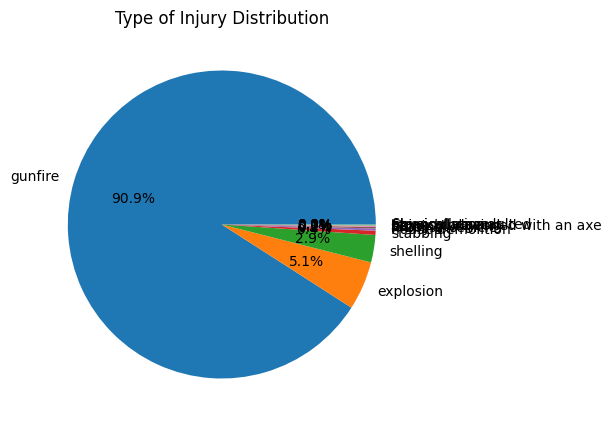

In [125]:
# Assuming you have 'type_of_injury_counts' as a Series with the counts
type_of_injury_counts = df['type_of_injury'].value_counts()
plt.figure(figsize=(7, 5))
plt.pie(type_of_injury_counts, labels=type_of_injury_counts.index, autopct='%1.1f%%')
plt.title('Type of Injury Distribution')
plt.show()

A very large portion of citizens were injured by gunfire, and then by explosions and shellings and stabbings.

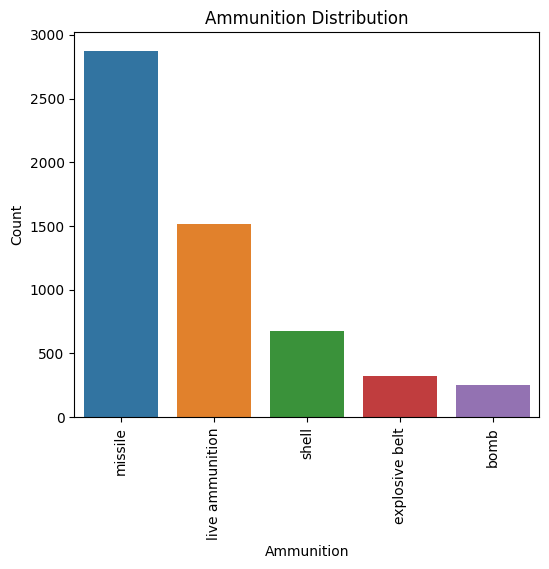

In [126]:
#Ammunition Distribution barplot
top5_ammunition_counts = df['ammunition'].value_counts().head(5)
plt.figure(figsize=(6, 5))
sns.barplot(x=top5_ammunition_counts.index, y=top5_ammunition_counts.values)
plt.title('Ammunition Distribution')
plt.xlabel('Ammunition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Here are the top five ammunition used for killing. Exceptionally large count of missiles were used for killing. Even live ammunition is used a lot to kill the civilians. Shells, explosive belts and bombs also contributed well for the murders.

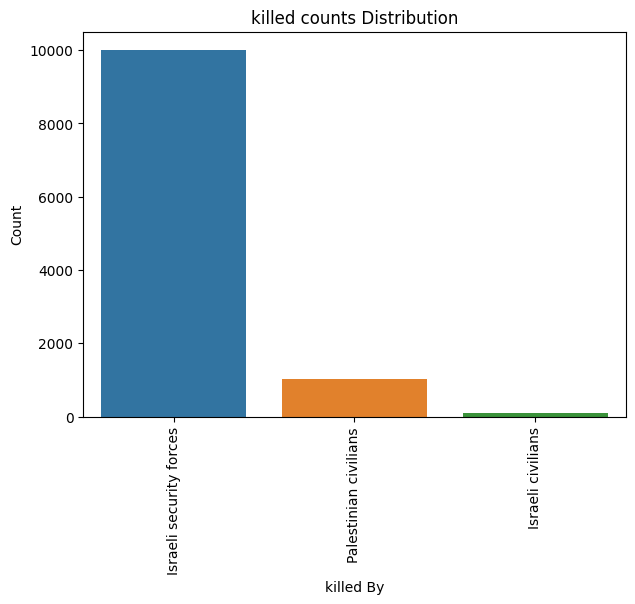

In [127]:
#Barplot of killed counts distribution
killed_by_counts = df['killed_by'].value_counts()
plt.figure(figsize=(7, 5))
sns.barplot(x=killed_by_counts.index, y=killed_by_counts.values)
plt.title('killed counts Distribution')
plt.xlabel('killed By')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

We can infer that, a large number were killed by Israeli security forces and Palestinian civilians.

#***Hypothesis*** ***Testing***

In [128]:
df['gender'] = df['gender'].replace({'M': 1, 'F': 0}).astype(float)
df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,1.0,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,1.0,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,1.0,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,1.0,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,1.0,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [129]:
df = df.apply(pd.to_numeric, errors='coerce')  #converts all columns to numeric type and then calculates skewness
df.skew(axis=0)

name                                 NaN
date_of_event                   0.461698
age                             1.403194
citizenship                          NaN
event_location                       NaN
event_location_district              NaN
event_location_region                NaN
date_of_death                   0.460577
gender                         -2.225210
took_part_in_the_hostilities         NaN
place_of_residence                   NaN
place_of_residence_district          NaN
type_of_injury                       NaN
ammunition                           NaN
killed_by                            NaN
notes                                NaN
dtype: float64

#**Z-test**

In [130]:
#finding mean of gender
mean_gender = df['gender'].mean()
mean_gender

0.8718479827089337

No let us make the Hypothesis with 95%.

1)  H0=0.8   2)  alpha=0.05   3)  nsquare=123743376   4)  n=11124

In [131]:
H0 = 0.8
sigma = df['gender'].std()
n=11124
# testing using Z-Test.
import math
from math import sqrt
z_cal = (mean_gender - H0)/(sigma/sqrt(n))

In [132]:
z_cal

22.669524215594674

In [133]:
from scipy import stats
p = 2*(1-stats.norm.cdf(np.abs(z_cal)))
alpha =0.05
if(p<=alpha):
    print("Reject H0")
else:
    print("Do not reject H0")

Reject H0


Therefore it suggests that the sample mean of the 'gender' significantly differs from 0.8 and it is evident to reject the null hypothesis at the 0.05 significance level.  

#**T-test**

In [134]:
mean_age = df['age'].mean()
mean_age

26.745702592087316

No let us make the Hypothesis with 99%

1)  H0=26.42   2)  alpha=0.01   3)  nsquare=123743376   4)  n=11124

In [135]:
H0 = 26.42
s = df['age'].std()     #Finding Standard deviation
n = 11124
dof = n-1                                   # degree of freedom
alpha = 0.01

In [136]:
t_cal = (mean_age - H0)/(s/sqrt(n))
t_cal

2.5073694645332862

In [137]:
p = 2*(1-stats.t.cdf(np.abs(t_cal),dof))
p

0.012177486103147173

In [138]:
if(p<=alpha):
    print("Reject H0")
else:
    print("Do not reject H0")

Do not reject H0


Therefore, the inference is that there is not enough evidence to conclude that the population mean of 'age' is different from 26.42 within the given sample, at a 99% confidence level and hence it is evident not to reject the null hypothesis at the 0.01 significance level.  


#***Inferences:***

1. The age of individuals in the dataset varies widely, with a mean age of approximately 26.44 years. The majority of individuals fall in the 19-31 age range.

2. The dataset is skewed toward males, with a higher number of male casualties compared to females.

3. Palestinian citizens outnumber Israeli citizens in the dataset, indicating a higher number of Palestinian casualties.

4. Over 4000 individuals were not involved in hostilities, while more than 3000 but less than 4000 were involved. Approximately 1000 casualties were Israeli, and nearly 200 were targeted killings. Another 2000 are unidentified.

5. Event counts were notably high in 2008-2009 and again in 2015-2016.

6. The number of events involving Israeli security forces appears to increase in 2008-2009 and again in 2015.

7. The majority of events involve unidentified weapons, followed by Qassam rockets and bombs. In 2015, Grad rockets and missiles were also used.

8. The top 5 event locations are Gaza City, Rafah, Khan Yunis, Jabalya RC, and Beit Lahiya, with Gaza City having the highest count.

9. The distribution of place of residence mirrors the event locations, with Gaza City being prominent.

10. Israeli security forces are responsible for a significant number of casualties, while Palestinian civilians are responsible for fewer casualties.